# Visualisation de données

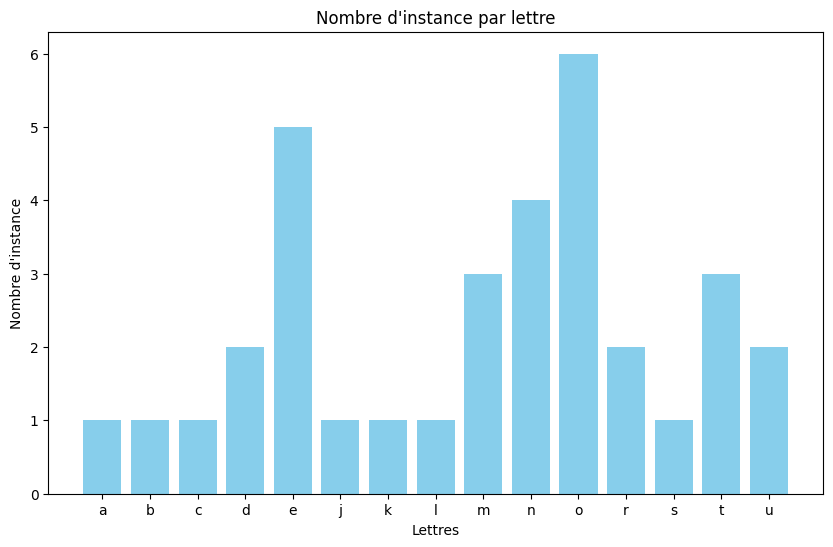

In [18]:
import matplotlib.pyplot as plt
from collections import Counter
import string

# Fonction pour générer le graphique en barres
def plot_letter_frequency(input_string):
    # Convertir la chaîne en minuscules et filtrer les caractères non alphabétiques
    filtered_string = ''.join([char.lower() for char in input_string if char in string.ascii_letters])

    # Compter la fréquence de chaque lettre
    letter_counts = Counter(filtered_string)

    # Trier les lettres pour un tracé cohérent
    letters = sorted(letter_counts.keys())
    frequencies = [letter_counts[letter] for letter in letters]

    # Tracé du graphique en barres
    plt.figure(figsize=(10, 6))
    plt.bar(letters, frequencies, color='skyblue')
    plt.xlabel('Lettres')
    plt.ylabel('Nombre d\'instance')
    plt.title('Nombre d\'instance par lettre')
    plt.show()

# Exemple d'utilisation
input_string = "Bonjour a tout le monde! Mon nom est Dereck."
plot_letter_frequency(input_string)

In [23]:
#pip install ipywidgets
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Function to plot sine and cosine waves
def plot_sine_cosine(frequency=1.0, amplitude=1.0):
    # Create an array of x values from 0 to 2π
    x = np.linspace(0, 2 * np.pi, 500)
    
    # Generate y values for sine and cosine based on frequency and amplitude
    sine_wave = amplitude * np.sin(frequency * x)
    cosine_wave = amplitude * np.cos(frequency * x)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, sine_wave, label=f'Sine wave (frequency={frequency}, amplitude={amplitude})', color='blue', lw=2)
    plt.plot(x, cosine_wave, label=f'Cosine wave (frequency={frequency}, amplitude={amplitude})', color='red', lw=2)
    plt.axhline(0, color='black',linewidth=0.5)
    
    # Add labels and legend
    plt.title('Interactive Sine and Cosine Waves')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper right')
    
    # Display the plot
    plt.grid(True)
    plt.show()

# Interactive widget with sliders for frequency and amplitude
interact(
    plot_sine_cosine,
    frequency=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Frequency'),
    amplitude=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Amplitude')
)

interactive(children=(FloatSlider(value=1.0, description='Frequency', max=10.0, min=0.1), FloatSlider(value=1.…

<function __main__.plot_sine_cosine(frequency=1.0, amplitude=1.0)>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Function to plot the 2D Gaussian distribution
def plot_gaussian(mean_x=0.0, mean_y=0.0, std_x=1.0, std_y=1.0):
    # Create a grid of x and y values
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    
    # Compute the 2D Gaussian function
    z = np.exp(-((x - mean_x) ** 2 / (2 * std_x ** 2) + (y - mean_y) ** 2 / (2 * std_y ** 2)))
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(x, y, z, levels=50, cmap='viridis')
    plt.colorbar(contour)
    
    # Add labels and title
    plt.title(f'2D Gaussian Distribution (mean_x={mean_x}, mean_y={mean_y}, std_x={std_x}, std_y={std_y})')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Show the plot
    plt.show()

# Interactive widget with sliders for mean and standard deviation
interact(
    plot_gaussian,
    mean_x=FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='Mean X'),
    mean_y=FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='Mean Y'),
    std_x=FloatSlider(value=1.0, min=0.1, max=2.5, step=0.1, description='Std Dev X'),
    std_y=FloatSlider(value=1.0, min=0.1, max=2.5, step=0.1, description='Std Dev Y')
)

interactive(children=(FloatSlider(value=0.0, description='Mean X', max=3.0, min=-3.0), FloatSlider(value=0.0, …

<function __main__.plot_gaussian(mean_x=0.0, mean_y=0.0, std_x=1.0, std_y=1.0)>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Function to plot the Mandelbrot set
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z * z + c
    return max_iter

# Function to create the Mandelbrot image
def plot_mandelbrot(x_center=0.0, y_center=0.0, zoom=1.0, max_iter=100):
    # Define the plot limits based on zoom and center position
    x_min, x_max = x_center - 1.5 / zoom, x_center + 1.5 / zoom
    y_min, y_max = y_center - 1.5 / zoom, y_center + 1.5 / zoom
    
    width, height = 800, 800
    x_vals = np.linspace(x_min, x_max, width)
    y_vals = np.linspace(y_min, y_max, height)
    
    # Create an empty array for storing the Mandelbrot image
    mandelbrot_image = np.empty((width, height))
    
    # Generate the Mandelbrot set by iterating over each pixel
    for i, x in enumerate(x_vals):
        for j, y in enumerate(y_vals):
            c = complex(x, y)
            mandelbrot_image[j, i] = mandelbrot(c, max_iter)
    
    # Plot the Mandelbrot set
    plt.figure(figsize=(8, 8))
    plt.imshow(mandelbrot_image.T, extent=[x_min, x_max, y_min, y_max], cmap='inferno', origin='lower')
    plt.colorbar(label='Iterations')
    plt.title(f'Mandelbrot Set (center=({x_center}, {y_center}), zoom={zoom}, max_iter={max_iter})')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.show()

# Interactive widget to explore the Mandelbrot set
interact(
    plot_mandelbrot,
    x_center=FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.01, description='X Center'),
    y_center=FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.01, description='Y Center'),
    zoom=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Zoom'),
    max_iter=IntSlider(value=100, min=50, max=500, step=10, description='Max Iter')
)

interactive(children=(FloatSlider(value=0.0, description='X Center', max=2.0, min=-2.0, step=0.01), FloatSlide…

<function __main__.plot_mandelbrot(x_center=0.0, y_center=0.0, zoom=1.0, max_iter=100)>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider, Dropdown

# Function to generate and plot 3D surface based on function type
def plot_3d_surface(function='sine', amplitude=1.0, frequency=1.0):
    # Create a grid of x and y values
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)

    # Select function type and generate corresponding z values
    if function == 'sine':
        z = amplitude * np.sin(frequency * np.sqrt(x**2 + y**2))
    elif function == 'gaussian':
        z = amplitude * np.exp(-(x**2 + y**2) * frequency)
    elif function == 'paraboloid':
        z = amplitude * (x**2 + y**2)
    else:
        z = np.zeros_like(x)
    
    # Create the plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
    
    # Set labels and title
    ax.set_title(f'3D Surface Plot - {function.capitalize()} (Amplitude={amplitude}, Frequency={frequency})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Show the plot
    plt.show()

# Interactive widget with dropdown for function selection and sliders for parameters
interact(
    plot_3d_surface,
    function=Dropdown(options=['sine', 'gaussian', 'paraboloid'], value='sine', description='Function'),
    amplitude=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Amplitude'),
    frequency=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Frequency')
)

interactive(children=(Dropdown(description='Function', options=('sine', 'gaussian', 'paraboloid'), value='sine…

<function __main__.plot_3d_surface(function='sine', amplitude=1.0, frequency=1.0)>